<a href="https://colab.research.google.com/github/AhmedElawady74/5-project-for-ML/blob/main/5_project_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I.  Про MNIST-подобные данные

In [ ]:
# Importing libraries
import numpy as np               # For numerical operations
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.decomposition import PCA        # For Principal Component Analysis
from sklearn.cluster import KMeans           # For K-Means clustering algorithm
from sklearn.metrics import silhouette_score # For evaluating clustering performance
from sklearn.datasets import fetch_openml   # For fetching open machine learning datasets
import cv2                        # OpenCV library for computer vision tasks
from sklearn.preprocessing import StandardScaler  # For standardizing feature values

In [ ]:
from keras.datasets import fashion_mnist

# Скачать данные Fashion-MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Преобразование изображений в одномерные массивы
X_train_flatten = X_train.reshape((X_train.shape[0], -1))
X_test_flatten = X_test.reshape((X_test.shape[0], -1))

# Использование метода главных компонент (PCA) с заданным количеством основных компонент
n_components = 50  # Выбор количества основных компонент
pca = PCA(n_components=n_components)

# Обучение модели на тренировочных данных и их преобразование
X_train_pca = pca.fit_transform(X_train_flatten)
X_test_pca = pca.transform(X_test_flatten)

# Пояснение: Преобразование изображений в одномерные массивы для возможности применения PCA.
# Затем мы выбрали количество основных компонент (в данном случае 50).
# После этого мы обучили модель на тренировочных данных и преобразовали тренировочные и тестовые данные.

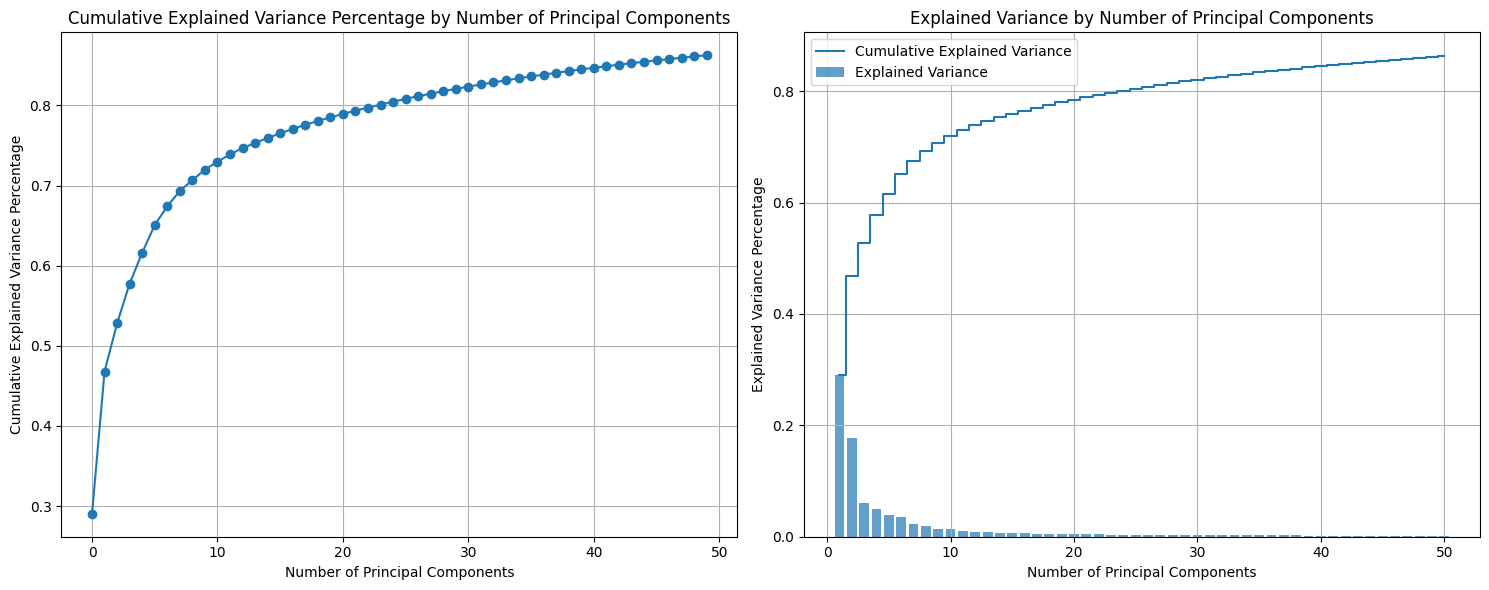

In [ ]:
# Расчет совокупной объясненной дисперсии для каждого главного компонента
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plotting in a different way
plt.figure(figsize=(15, 6))

# First plot
plt.subplot(1, 2, 1)
plt.plot(explained_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Percentage by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Percentage')
plt.grid(True)

# Second plot
plt.subplot(1, 2, 2)
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Explained Variance')
plt.step(range(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Percentage')
plt.title('Explained Variance by Number of Principal Components')
plt.legend()
plt.grid(True)

# Displaying both plots side by side
plt.tight_layout()
plt.show()

Что мы заметили:

- На первом графике мы наблюдаем совокупный процент объясненной дисперсии по мере увеличения количества главных компонентов. Это помогает нам понять, сколько информации сохраняется с каждым дополнительным компонентом.
- На втором графике мы видим индивидуальную объясненную дисперсию для каждого главного компонента и совокупную объясненную дисперсию. Это дает представление о вкладе каждого компонента в общую дисперсию и помогает решить, сколько компонентов сохранить.
- Код визуально демонстрирует компромисс между количеством главных компонентов и величиной объясненной дисперсии. Это помогает определить оптимальное количество компонентов, которые следует сохранить для уменьшения размерности.

In [ ]:
# Reshaping to 2D instead of 3D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Defining the number of principal components required
n_components = 30  # You can change this number according to your needs

# Applying PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train_flat)

# Defining the desired number of clusters
n_clusters = 3  # You can change this number according to your needs

# Initializing and executing the K-Means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)

# Using the labels obtained from K-Means
labels = kmeans.labels_

# Printing the labels
print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 2 ... 2 1 1]


Мы наблюдали:

- Код выполняет уменьшение размерности с использованием PCA, изменяя форму изображений из 3D в 2D.
- Он применяет PCA, чтобы уменьшить количество функций до указанного количества основных компонентов (в данном случае 30).
- Затем к данным уменьшенной размерности применяется кластеризация K-средних для группировки похожих изображений в кластеры.
- Количество кластеров предопределено как 3, но вы можете изменить его в соответствии со своими требованиями.
- Напечатанные метки представляют собой назначения кластеров для каждого изображения в обучающем наборе после применения кластеризации K-средних. Эти назначения кластеров будут дополнительно проанализированы на последующих этапах задачи.

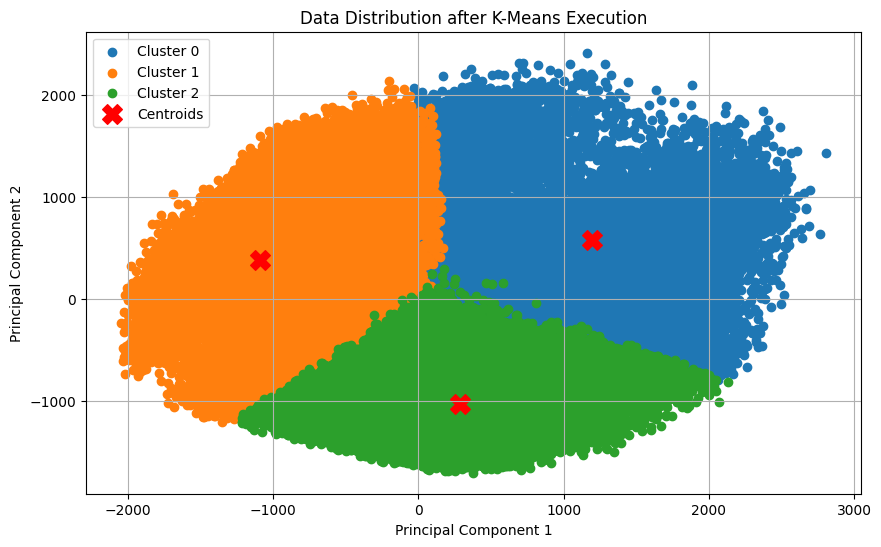

In [ ]:
# Plotting data based on K-Means labels
plt.figure(figsize=(10, 6))

for i in range(n_clusters):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Data Distribution after K-Means Execution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Что мы наблюдали:

- Код создает диаграмму рассеяния точек данных на основе меток, полученных в результате кластеризации K-средних.
- График визуализирует, насколько хорошо K-Means сгруппировал схожие точки данных в пространстве уменьшенной размерности.
- Эта визуализация помогает нам понять распределение и разделение кластеров в двух основных компонентах, полученных из PCA.
- Центроиды кластера (красные маркеры «X») обозначают центральные точки, вокруг которых группируются точки данных в каждом кластере.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

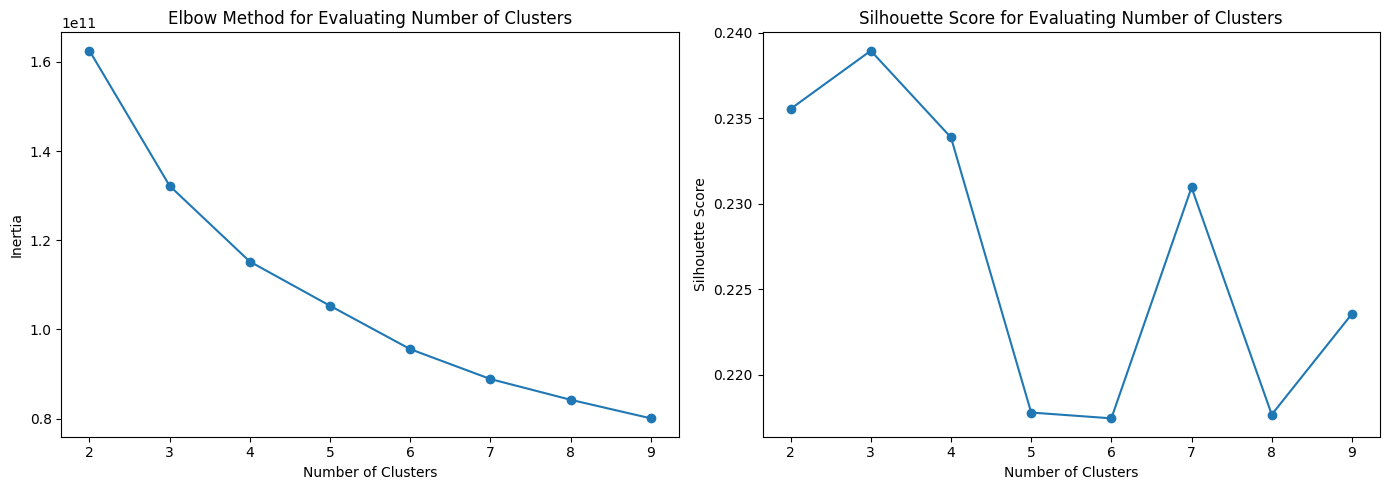

Cluster     0     1     2
Actual                   
0        1352   625  4023
1         104    76  5820
2        4374  1283   343
3         279   257  5464
4        4472   519  1009
5          17  5969    14
6        3027  1485  1488
7           5  5995     0
8        3019  2559   422
9         786  5174    40


In [ ]:
# Evaluating the optimal number of clusters using the Elbow method and Silhouette Score
inertia_values = []
silhouette_scores = []
possible_k_values = range(2, 10)  # You can change this range as needed

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plotting the Elbow method and Silhouette Score
plt.figure(figsize=(14, 5))

# Elbow method
plt.subplot(1, 2, 1)
plt.plot(possible_k_values, inertia_values, marker='o')
plt.title('Elbow Method for Evaluating Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Evaluating Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Using pd.crosstab to analyze the relationship between clusters and image labels
crosstab_result = pd.crosstab(y_train, labels, rownames=['Actual'], colnames=['Cluster'])
print(crosstab_result)

Что мы наблюдали:

- Код вычисляет и строит график метода Elbow и Silhouette Score, чтобы помочь определить оптимальное количество кластеров.
- Метод локтя помогает найти «точку локтя», в которой скорость снижения инерции замедляется.
- Показатель Silhouette показывает, насколько хорошо разделены кластеры: более высокие значения указывают на более четкие кластеры.
- Графики помогают выбрать оптимальное количество кластеров, сбалансировав снижение инерции и оценку силуэта.
- Анализ pd.crosstab показывает взаимосвязь между фактическими метками изображений и кластерами, назначенными K-Means.
- Этот анализ дает представление о том, насколько хорошо кластеризация соответствует реальным классам, что помогает оценить результаты кластеризации.

In [ ]:
# Краткое содержание
# Оценка результатов кластеризации
# Комментарии об успешности кластеров в группировке данных и связи кластеров с реальными метками

# Расчет Silhouette Score для оценки качества кластеризации
average_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

# Printing the final evaluation
print(f"Average Silhouette Score: {average_silhouette_score}")
print("\nTable of the relationship between clusters and image labels:")
print(crosstab_result)

Average Silhouette Score: 0.22355146027336756

Table of the relationship between clusters and image labels:
Cluster     0     1     2
Actual                   
0        1352   625  4023
1         104    76  5820
2        4374  1283   343
3         279   257  5464
4        4472   519  1009
5          17  5969    14
6        3027  1485  1488
7           5  5995     0
8        3019  2559   422
9         786  5174    40


Значение кода/результата:

- Код вычисляет средний показатель Silhouette Score, который измеряет, насколько хорошо разделены кластеры. Более высокие баллы указывают на более четко определенные кластеры.
- Средний балл Silhouette служит окончательным показателем оценки качества результатов кластеризации.
- Распечатанный результат включает в себя среднюю оценку силуэта и таблицу, показывающую взаимосвязь между кластерами, присвоенными K-средними, и фактическими метками изображений.
- Эта информация дает представление об общей производительности алгоритма кластеризации, показывая, насколько хорошо он сгруппировал данные и их соответствие фактическим меткам изображений.

# II.  На реальных данных

In [ ]:
# Импорт библиотек
import numpy as np  # NumPy используется для работы с массивами и математическими операциями
import pandas as pd  # Pandas используется для обработки и анализа данных в формате таблицы (DataFrame)
import matplotlib.pyplot as plt  # Matplotlib используется для визуализации данных
import seaborn as sns  # Seaborn также используется для красивой визуализации данных

from sklearn.preprocessing import StandardScaler  # StandardScaler из scikit-learn используется для стандартизации данных
from sklearn.cluster import KMeans  # KMeans из scikit-learn используется для реализации алгоритма K-Means для кластеризации
from sklearn.decomposition import PCA  # PCA (Principal Component Analysis) из scikit-learn используется для анализа главных компонент

In [ ]:
# Чтение файла данных
file_path = '/content/cars_moldova.csv' # данные cars_moldova всегда лучшие xD
df = pd.read_csv(file_path)

# Вывод первых столбцов и данных
print(df.head())

         Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0  


In [ ]:
df.columns
#Имена столбцов

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')

In [ ]:
# Информация о данных
print(df.info())

# Статистика и краткое описание
print(df.describe())

# Проверка на отсутствующие значения
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  41007 non-null  object 
 1   Model                 41007 non-null  object 
 2   Year                  41007 non-null  int64  
 3   Style                 41007 non-null  object 
 4   Distance              41007 non-null  float64
 5   Engine_capacity(cm3)  41007 non-null  float64
 6   Fuel_type             41007 non-null  object 
 7   Transmission          41007 non-null  object 
 8   Price(euro)           41007 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.8+ MB
None
               Year      Distance  Engine_capacity(cm3)   Price(euro)
count  41007.000000  4.100700e+04          41007.000000  4.100700e+04
mean    2007.976175  4.567353e+05           1853.856732  9.727109e+03
std        8.241487  4.451897e+06            700.36453

Мы использовали эти команды, чтобы получить обзор данных, изучить типы данных и проверить наличие пропущенных значений.

In [ ]:
# Initial Data Review
print("Number of rows and columns in the data:", df.shape)

# Handling missing data if any
df.dropna(inplace=True)

# Checking the impact of cleaning on data size
print("Number of rows and columns after cleaning:", df.shape)

# Numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print("\nNumeric Columns:")
print(numeric_columns)

Number of rows and columns in the data: (41007, 9)
Number of rows and columns after cleaning: (41007, 9)

Numeric Columns:
['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)']


- Первоначальный просмотр данных: печатается исходное количество строк и столбцов в наборе данных.
- Обработка отсутствующих данных: он удаляет строки с отсутствующими значениями для очистки набора данных.
- Проверка влияния очистки: печатается количество строк и столбцов после очистки, чтобы увидеть влияние.
- Числовые столбцы: он идентифицирует и печатает столбцы с числовыми типами данных.
> Этот код имеет решающее значение для подготовки и понимания набора данных перед тем, как приступить к дальнейшему анализу и задачам кластеризации. Это гарантирует, что данные чисты и готовы к последующим шагам задачи.

<Figure size 1600x800 with 0 Axes>

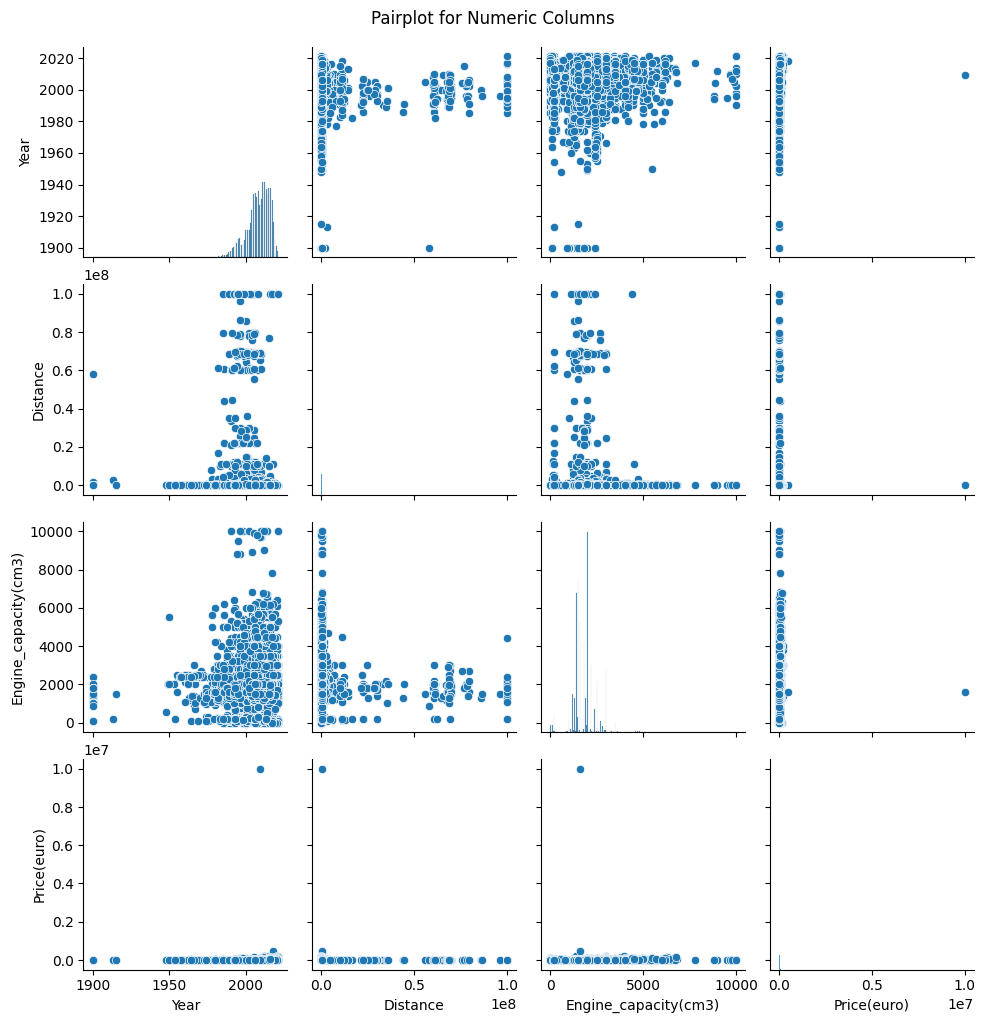

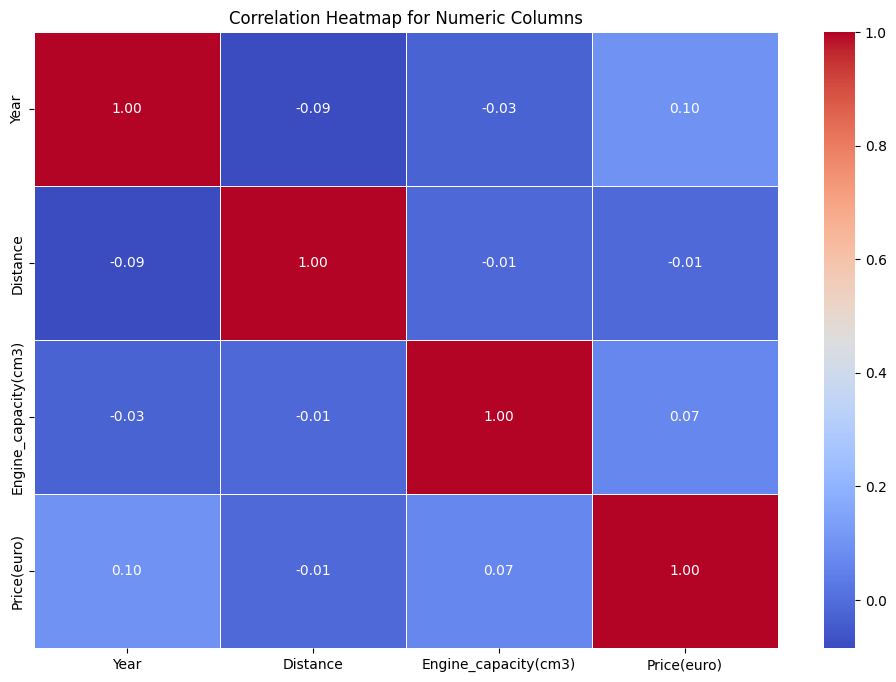

In [ ]:
# Analyzing relationships between columns
plt.figure(figsize=(16, 8))

# Drawing pairplot for numeric columns
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot for Numeric Columns", y=1.02)
plt.show()

# Drawing a heatmap for a comprehensive analysis of relationships between columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

Объяснение:

1- Парный график для числовых столбцов:
- Парный график визуально представляет отношения между числовыми столбцами.
- Каждый подграфик в сетке показывает точечную диаграмму одного числового столбца относительно другого.
- Диагональные подграфики отображают гистограммы для отдельных числовых столбцов.
- Это помогает визуализировать распределение и потенциальные корреляции между переменными.

2- Тепловая карта корреляции:
- Тепловая карта иллюстрирует матрицу корреляции между числовыми столбцами.
- Каждая ячейка тепловой карты представляет коэффициент корреляции между двумя столбцами.
- Интенсивность цвета и аннотации предоставляют информацию о силе и направлении корреляций.
- Это помогает выявить закономерности, сильные корреляции или мультиколлинеарность между числовыми признаками.

> Наблюдения:
- Парный график помогает визуализировать связи и закономерности распределения между числовыми столбцами.
- Тепловая карта дает количественный обзор корреляций: более темные цвета указывают на более сильную корреляцию.
- Наблюдение за парным графиком и тепловой картой помогает понять взаимозависимости и потенциальную мультиколлинеарность среди числовых функций.

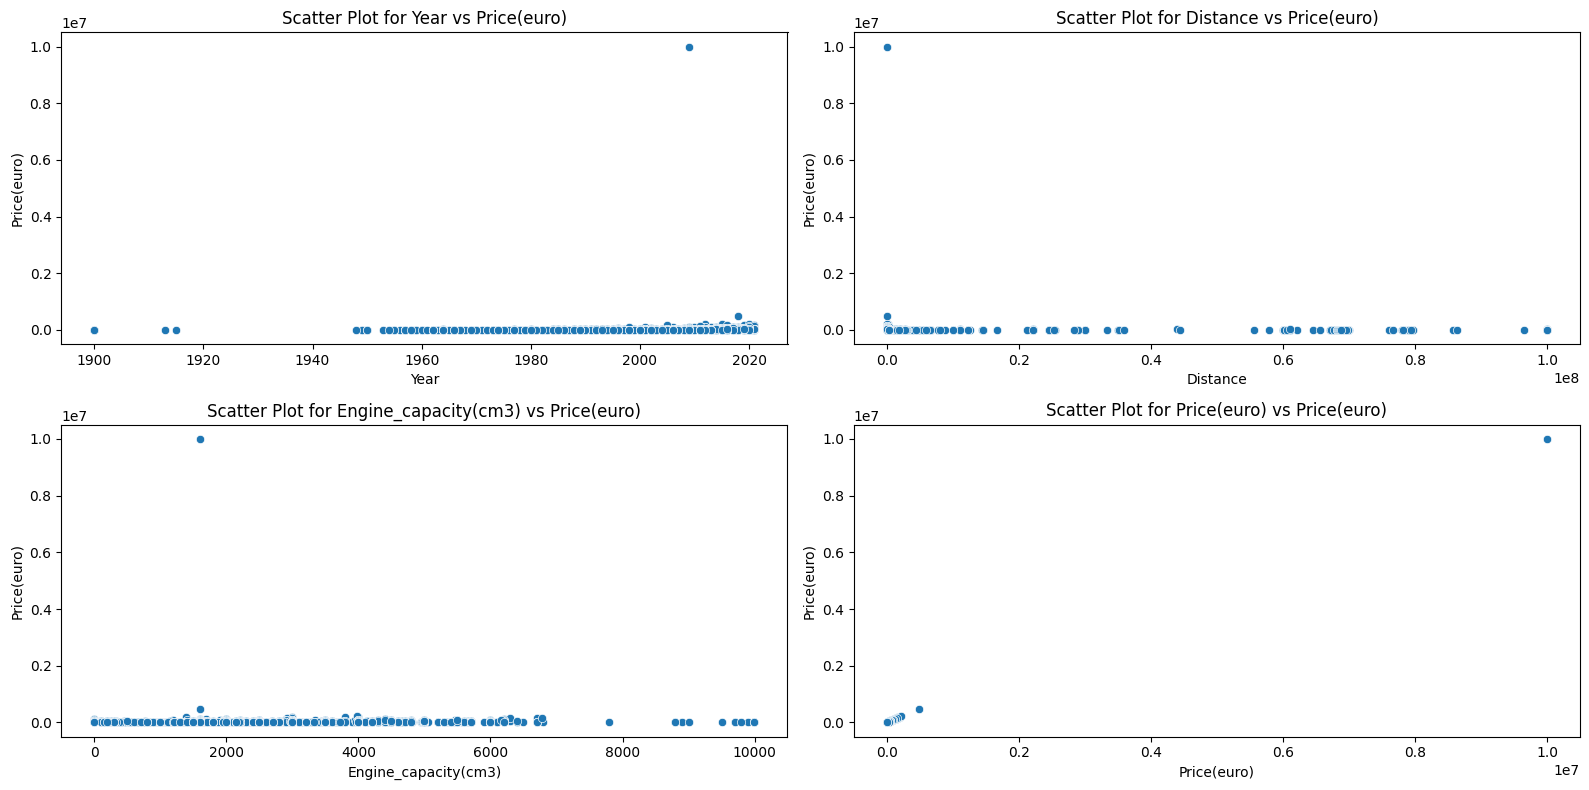

<Figure size 1600x800 with 0 Axes>

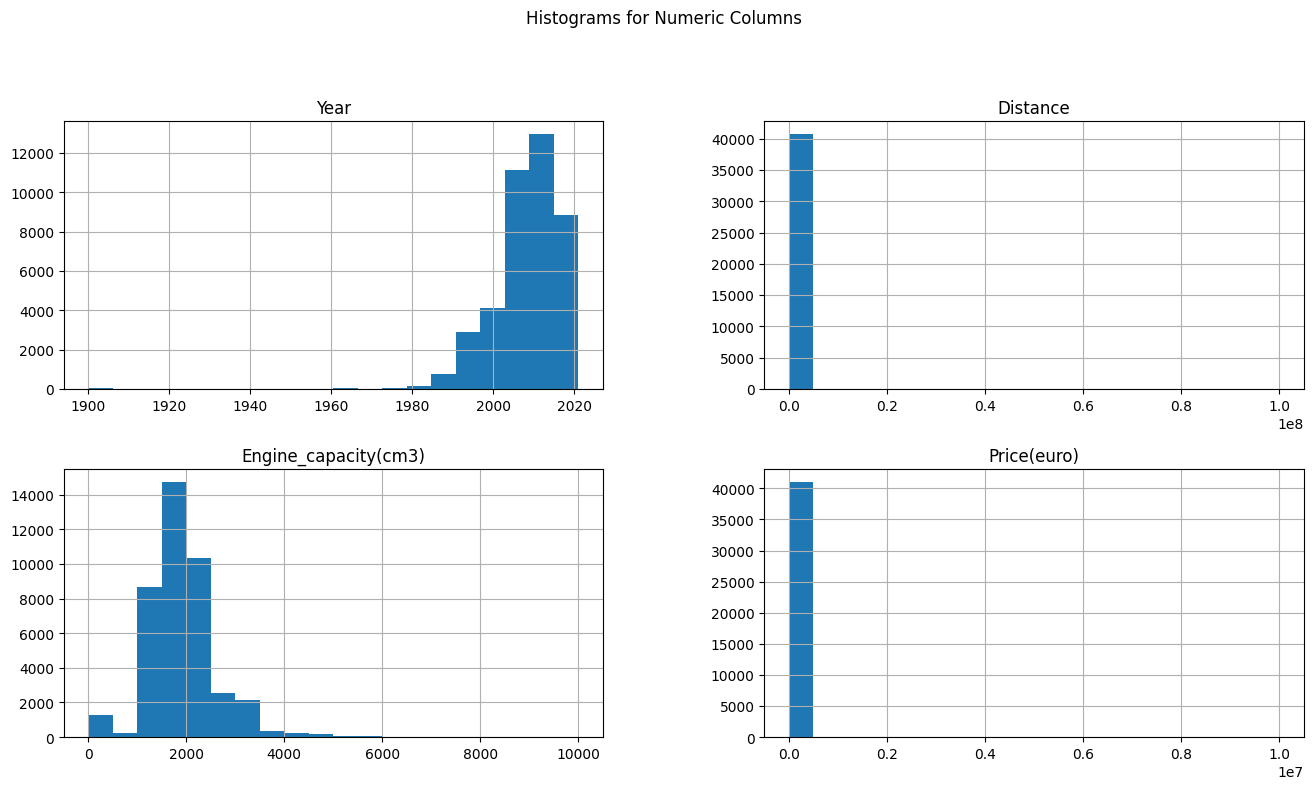

In [ ]:
# Drawing scatter plot for each numeric column with the target (Price(euro))
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=col, y='Price(euro)', data=df)
    plt.title(f'Scatter Plot for {col} vs Price(euro)')

plt.tight_layout()
plt.show()

# Drawing histograms for numeric columns
plt.figure(figsize=(16, 8))
df[numeric_columns].hist(bins=20, figsize=(16, 8), layout=(2, 2))
plt.suptitle("Histograms for Numeric Columns", y=1.02)
plt.show()

Объяснение:

1- Диаграмма рассеяния для числовых столбцов с целью (цена (евро)):
- Этот код генерирует сетку диаграмм рассеяния 2x2.
Каждый подграфик представляет собой диаграмму рассеяния между одним числовым столбцом и целевым столбцом «Цена (евро)».
- Это помогает визуализировать взаимосвязь между отдельными числовыми функциями и целевой переменной.
- Функция sns.scatterplot используется для построения диаграмм рассеяния.

2- Гистограммы для числовых столбцов:
- Этот код генерирует гистограммы для каждого числового столбца в макете 2x2.
- Он обеспечивает визуальное представление распределения числовых переменных.
- Функция df[numeric_columns].hist используется для создания гистограмм с 20 интервалами.
- Общий заголовок задается с помощью plt.suptitle.

> Наблюдения:
- Диаграммы рассеяния помогают наблюдать корреляцию между каждым числовым признаком и целевой переменной.
- Гистограммы иллюстрируют распределение числовых признаков, помогая выявить асимметрию или закономерности в данных.
- Визуализации помогают понять, как числовые характеристики связаны с целевой переменной «Цена (евро)».

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    40768
1       88
4       81
2       38
3       32
Name: Cluster, dtype: int64


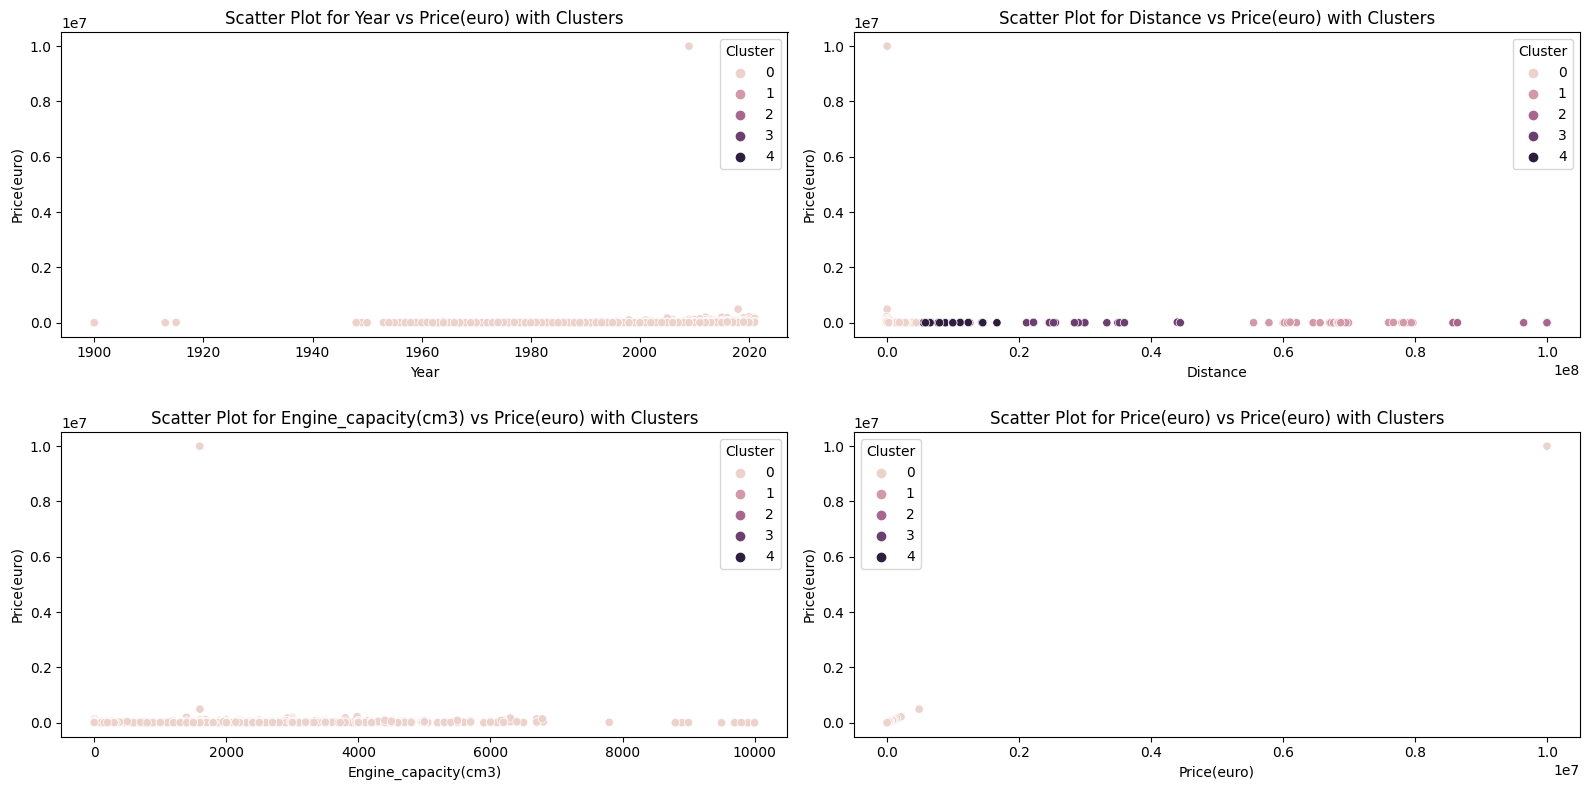

In [ ]:
# Choosing the desired number of clusters
num_clusters = 5  # This number can be changed based on the need

# Choosing the numeric features for clustering
numeric_features = df[numeric_columns]

# Applying the K-Means algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(numeric_features)

# Displaying the results
print(df['Cluster'].value_counts())

# Drawing a scatter plot for each numeric column with the target (Price(euro)) and clusters
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=col, y='Price(euro)', hue='Cluster', data=df)
    plt.title(f'Scatter Plot for {col} vs Price(euro) with Clusters')

plt.tight_layout()
plt.show()

1- Выбор количества кластеров:

- Для переменной num_clusters установлено значение 5, что соответствует желаемому количеству кластеров. Это число может быть скорректировано в зависимости от конкретных требований анализа.

2- Применение кластеризации K-средних:
- Алгоритм K-Means применяется к числовым функциям (numeric_features) с использованием выбранного количества кластеров.
- В фрейм данных добавлен столбец «Кластер» для хранения назначений кластера.

3- Отображение количества кластеров:
- Количество точек данных в каждом кластере выводится на консоль с помощью print(df['Cluster'].value_counts()).

4- Диаграмма рассеяния с кластерами:
- Создается сетка точечных диаграмм размером 2x2, где каждый подграфик представляет собой точечную диаграмму между одним числовым столбцом и целевым столбцом «Цена (евро)» с различными кластерами, отличающимися цветами.
- Параметр hue='Cluster' используется для визуализации точек данных, принадлежащих разным кластерам.
- Эта визуализация помогает наблюдать, как кластеры связаны с числовыми признаками и целевой переменной.

> Наблюдения:
- Диаграммы рассеяния с кластерами позволяют нам увидеть, как кластеры распределяются относительно каждого числового признака и их влияние на целевую переменную «Цена (евро)».

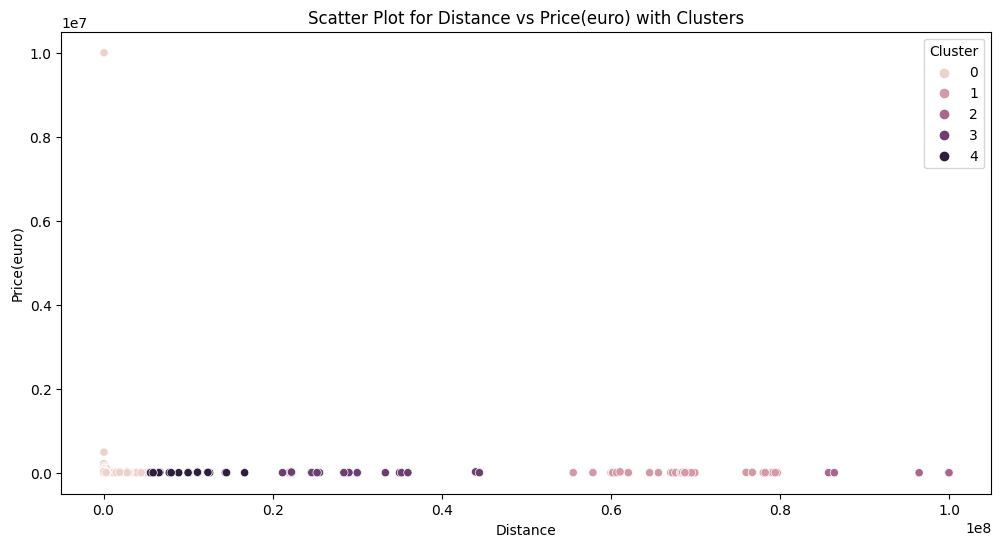

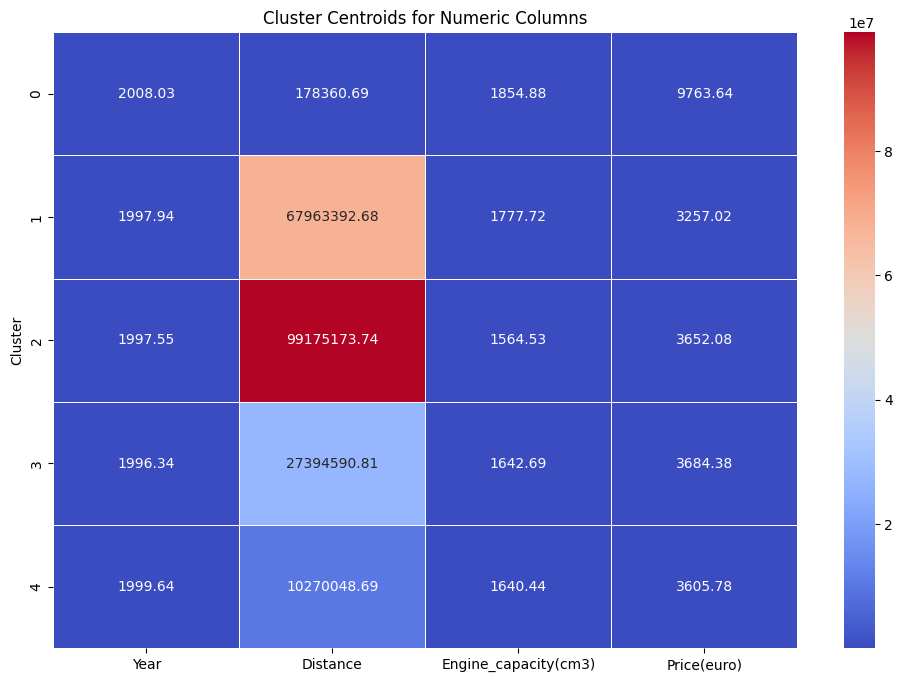

In [ ]:
# Drawing a scatter plot for two numeric columns with clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distance', y='Price(euro)', hue='Cluster', data=df)
plt.title('Scatter Plot for Distance vs Price(euro) with Clusters')
plt.show()

# Drawing a heatmap for the relationships between numeric features and clusters
plt.figure(figsize=(12, 8))
sns.heatmap(df.groupby('Cluster')[numeric_columns].mean(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Cluster Centroids for Numeric Columns')
plt.show()

Объяснение:

1- Диаграмма рассеяния ((Distance vs Price)):
- Визуализирует связь между «Расстояние» и «Цена (евро)» с отдельными кластерами.
- Помогает понять, как эти две функции различаются в разных кластерах.

2- Cluster Centroids Heatmap for Numerical Columns:
- Отображает средние значения числовых признаков для каждого кластера.
- Помогает выявить закономерности или различия в значениях признаков между кластерами.

> Наблюдения:
- Точечная диаграмма показывает распределение «Расстояния» и «Цены (евро)» с назначениями кластеров.
- Тепловая карта иллюстрирует средние числовые значения признаков по кластерам, выявляя закономерности в поведении признаков между кластерами.

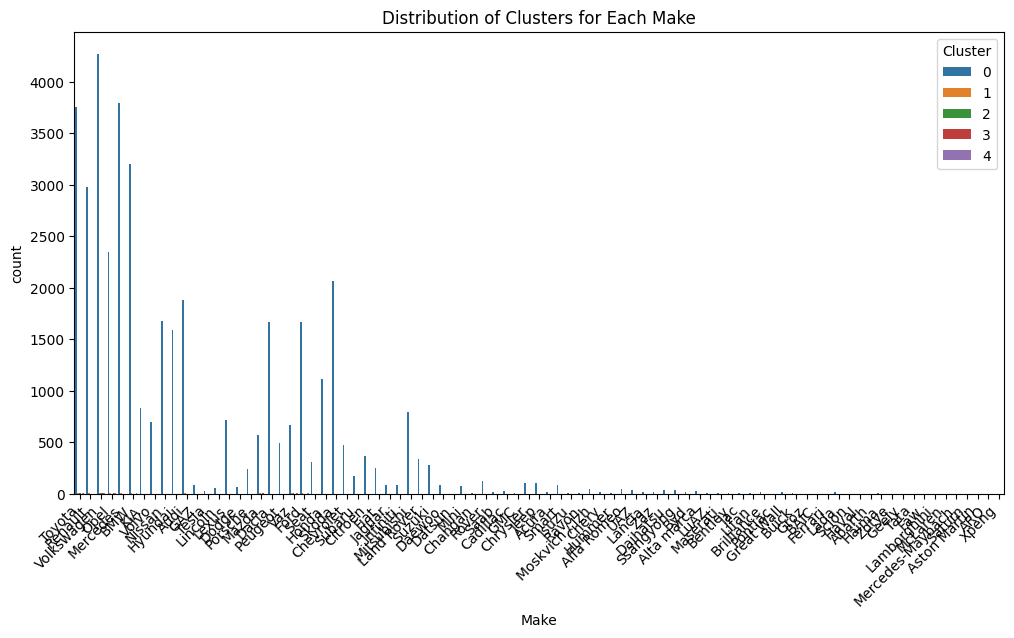

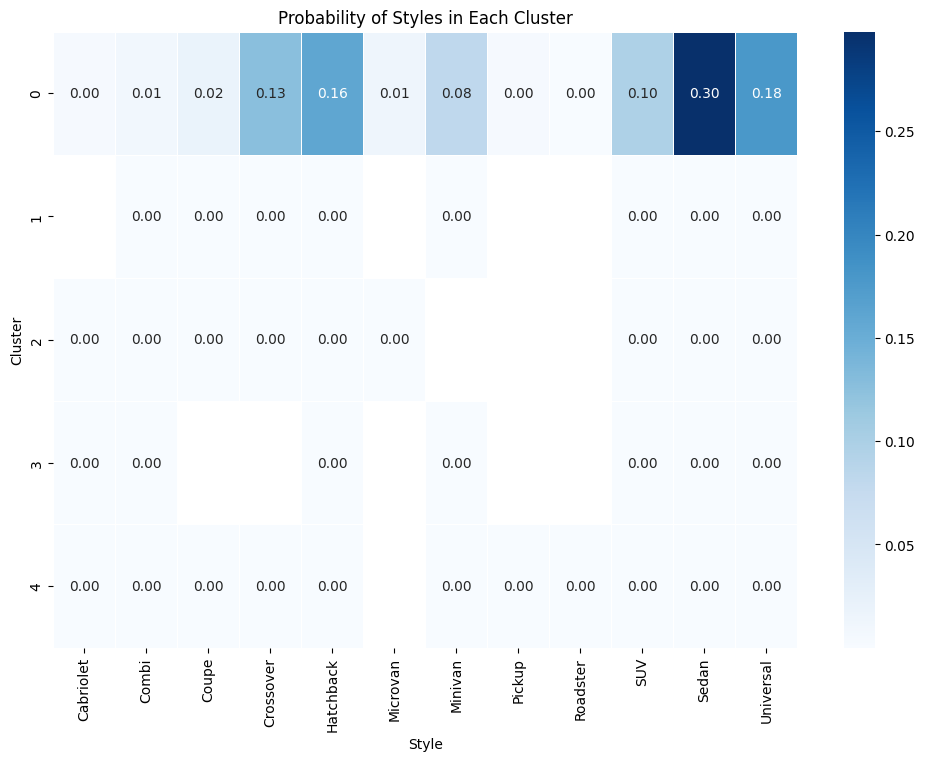

In [ ]:
# Countplot: Distribution of Clusters for Each Make
plt.figure(figsize=(12, 6))
sns.countplot(x='Make', hue='Cluster', data=df)
plt.title('Distribution of Clusters for Each Make')
plt.xticks(rotation=45, ha='right')
plt.show()

# Heatmap: Probability of Styles in Each Cluster
cluster_style_probabilities = df.groupby(['Cluster', 'Style']).size().div(len(df)).unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_style_probabilities, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Probability of Styles in Each Cluster')
plt.show()

1- Countplot (Distribution of Clusters for Each Make):
- Иллюстрирует распределение кластеров по категориальной переменной (например, «Создать»).
- Помогает определить, как кластеры распределяются внутри разных категорий переменной.

2- Тепловая карта (Probability of Styles in Each Cluster):
- Показывает вероятность каждой категории стиля в каждом кластере.
- Предоставляет представление о вероятности появления определенного стиля в каждом кластере.

> Наблюдения:
- График подсчета визуализирует, как кластеры распределяются между разными марками автомобилей.
- Тепловая карта отображает вероятность каждого стиля автомобиля в каждом кластере, предлагая представление о стилевых предпочтениях внутри кластеров.

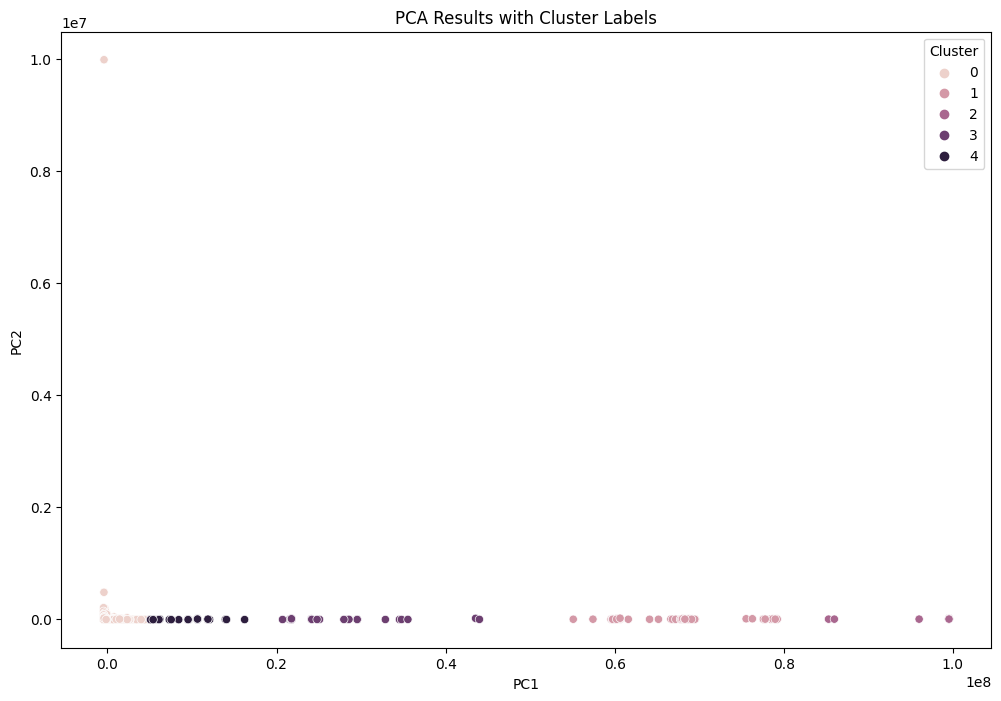

In [ ]:
# Selecting the desired number of dimensions after Principal Component Analysis (PCA)
num_dimensions = 4  # This number can be changed as needed

# Using PCA
pca = PCA(n_components=num_dimensions)
pca_result = pca.fit_transform(numeric_features)

# Creating a new DataFrame for the results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(num_dimensions)])
pca_df['Cluster'] = df['Cluster']

# Scatter plot for the results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df)
plt.title('PCA Results with Cluster Labels')
plt.show()

> PCA (Principal Component Analysis):
- Reduces the dimensionality of the numeric features to the specified number of dimensions (num_dimensions).
- Captures the most significant information in the data.

> Scatter Plot (PCA Results with Cluster Labels):
- Visualizes the data in the reduced-dimensional space created by PCA.
- Each point represents an observation, colored by its cluster label.
- Helps identify patterns or separations in the data after dimensionality reduction.


> Observations:
The scatter plot illustrates the distribution of data points in a reduced-dimensional space, allowing for the observation of potential patterns or clusters, especially with respect to the specified clusters.